IA & Data science (3i026) -- 2018-2019
--------
*&copy; Equipe pédagogique: Manon Ansart, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*

# TD-TME09: études et améliorations des K-moyennes

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

CARNIELLI Ariana

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Compléter le nom de ce notebook en rajoutant les noms des membres du binômes séparés par un tiret.

## Préparation


Décompresser l'archive, elle crée le répertoire "tme8" qui contient un fichier ipython à ouvrir (ce fichier-ci) et un sous-répertoire "data" contenant les bases d'apprentissage utilisées dans cette séance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')

# Importation de la librairie iads
import iads as iads

# importation de LabeledSet
from iads import LabeledSet as ls

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

## Visualisation des données

Lorsque les données sur lesquelles on travaille possèdent plus de 2 dimensions, il est impossible de les visualiser simplement comme on a pu le faire dans les séances précédentes.

Une façon de mieux visualiser ces données et alors d'utiliser les outils d'un package de visualisation.

Le package <code>seaborn</code> est très pratique (vous pouvez consulter la documentation sur le web) et généralement installé dans l'environnement Python.

Nous utilisons ici la fonction <code>pairplot</code> de ce package. Cette fonction permet d'afficher les corrélations des dimensions prises 2 à 2.




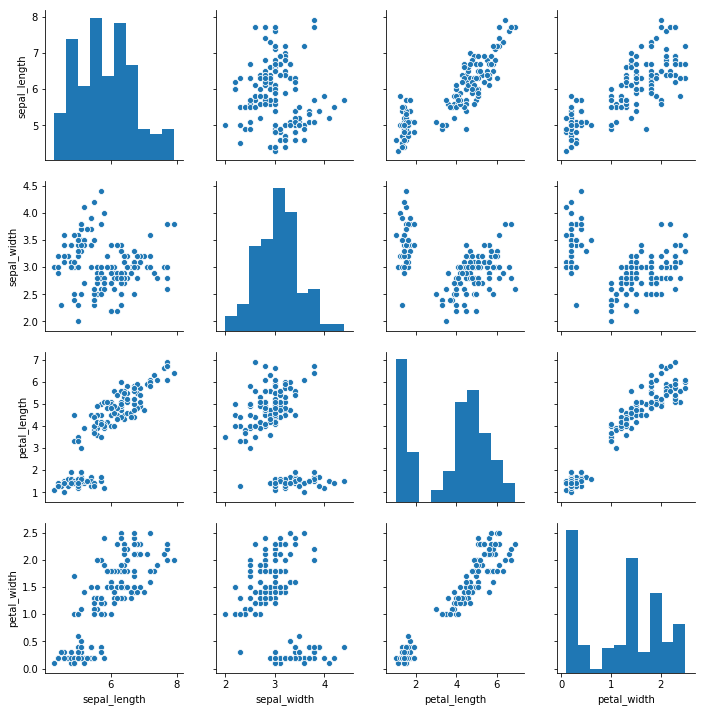

In [2]:
# Importation du package seaborn:
import seaborn as sns


# On créé un dataframe df. 
# Par exemple :
df = sns.load_dataset('iris')

# on utilise ici une fonction particulière de seaborn pour charger les données des Iris de Fischer


# A partir de df, on construit l'ensemble des corrélations des dimensions prises 2 à 2:
sns.pairplot(df)

# Eventuellement, mais pas nécessairement utile:
#sns.plt.show()


### Chargement du fichier "base_2D.csv"

In [3]:
data_2D = pd.read_csv("data/base-2D.csv")
data_2D[0:5]  # ou bien: data_2D[0:len(data_2D)]

,X,Y
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0


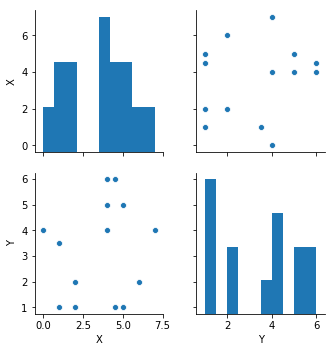

In [4]:
# Affichage des corrélations:
sns.pairplot(data_2D)


Dans la suite, il est conseillé de travailler sur des données de type <tt>DataFrame</tt> le plus souvent possible.

**Important**: dans la suite de ce TP, on appelle:

- "base d'apprentissage" le DataFrame contenant l'ensemble des exemples d'apprentissage chargés par la commande précédenteµ
- "base d'exemples" : un DataFrame contenant un ensemble d'exemples (remarque: la base d'apprentissage est le plus grand ensemble d'exemples possible)

## Mise à jour de votre librairie IADS

<font color="RED" size="+1">**[Q]**</font> Dans un premier temps, rajoutez les fonctions écrites lors de la séance précédentes dans le fichier <code>kmoyennes.py</code> qui sera placé dans le répertoire <code>iads</code> de votre package de fonction 3i026. (pour mémoire, vous pouvez retourner voir le sujet des séances 3 à 5).


Pour cela, reprenez le fichier <code>kmoyennes.py</code> qui se trouve dans le répertoire <code>tme09</code> de cette séance, placez le dans le répertoire <code>iads</code> et complétez-le en reprenant les fonctions que vous avez écrites dans la séance précédente.



Une fois le fichier <tt>kmoyennes.py</tt> complété et sauvegardé, il est possible d'utiliser les fonctions qui y sont définies en l'important:

In [5]:
# Importation des fonctions écrites dans les fichiers python que contient le répertoire (package) IADS2018:
# importation de utils
from iads import kmoyennes as km


## Travail à réaliser

<font color="RED" size="+1">**[Q]**</font> Tester la fonction <tt>kmoyennes()</tt> avec les données jouets de <code>data_2D</code> (une fois normalisées).

iteration  0  Inertie :  1.0401919339164236  Difference:  0.0


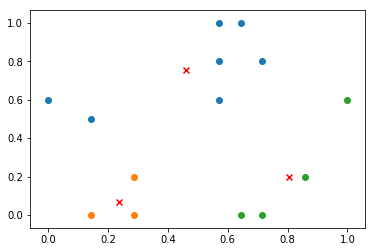

In [26]:
# Normalisation:
data_2Dnorm = km.normalisation(data_2D)

# Essai avec k=3:
les_centres, l_affectation = km.kmoyennes(3, data_2Dnorm, 0.05, 100)

# Affichage du résultat:
km.affiche_resultat(data_2Dnorm,les_centres,l_affectation)

Utiliser les fonctions écrites dans les séances sur l'apprentissage supervisé (<code>createGaussianDataset</code>) pour générer des ensembles de points en 2 dimensions afin de tester la fonction <tt>kmoyennes()</tt>. 
Par exemple, pour générer des points répartis en 2 groupes:

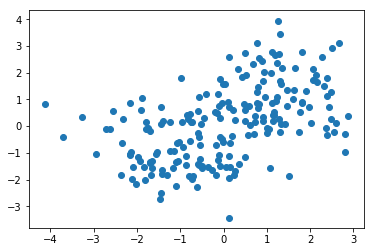

In [27]:
# Utilisation de cette fonction :
the_set = ut.createGaussianDataset(np.array([1,1]) ,np.array([[1,0],[0,1]]), \
                                   np.array([-1,-1]),np.array([[1,0],[0,1]]), 100)

# Transformation du labeledSet en DataFrame: (on sait qu'il n'y a que 2 dimensions)
les_X0 = []
les_X1 = []
for i in range(0,the_set.size()):
    les_X0.append(the_set.getX(i)[0])
    les_X1.append(the_set.getX(i)[1])

# Affichage des points obtenus
data_random = pd.DataFrame({'X':les_X0, 'Y':les_X1})
plt.scatter(data_random['X'],data_random['Y'])

# Normalisation pour pouvoir utiliser la fonction kmoyennes() par la suite:
DataRandom = km.normalisation(data_random)

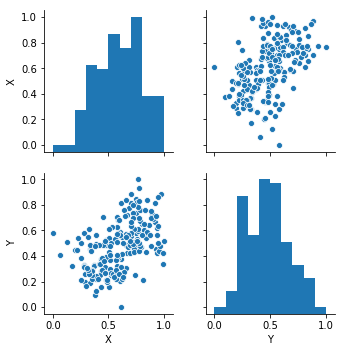

In [28]:
# Affichage des corrélations:

sns.pairplot(DataRandom)


<font size="+1" color="RED">**[Q]**</font> Tester la fonction <tt>kmoyennes()</tt> sur le jeu de données généré en utilisant différentes valeurs de $K$.

iteration  0  Inertie :  5.476469549859124  Difference:  0.5862468404449972
iteration  1  Inertie :  5.463126678264904  Difference:  0.01334287159422054


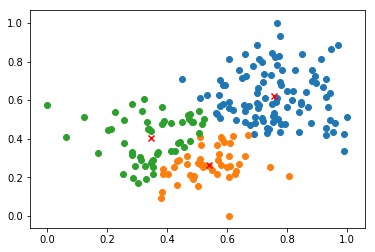

In [29]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(3, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

iteration  0  Inertie :  5.917219699121616  Difference:  1.97436639627493
iteration  1  Inertie :  5.53811151806189  Difference:  0.3791081810597259
iteration  2  Inertie :  5.50601837477542  Difference:  0.032093143286470394


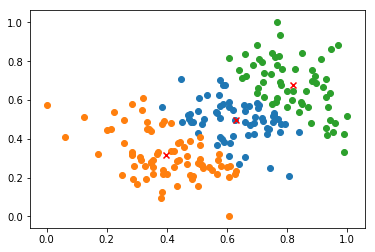

In [30]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(3, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

iteration  0  Inertie :  7.3977343163425076  Difference:  2.9086664535632227
iteration  1  Inertie :  6.88152636191505  Difference:  0.5162079544274576
iteration  2  Inertie :  6.855650064421612  Difference:  0.025876297493438116


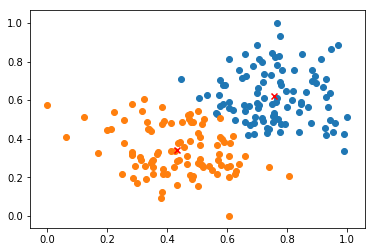

In [31]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(2, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

iteration  0  Inertie :  3.744668864905647  Difference:  0.9092931256531824
iteration  1  Inertie :  3.4822413125537146  Difference:  0.2624275523519324
iteration  2  Inertie :  3.413656802931787  Difference:  0.06858450962192775
iteration  3  Inertie :  3.3933478795851775  Difference:  0.020308923346609387


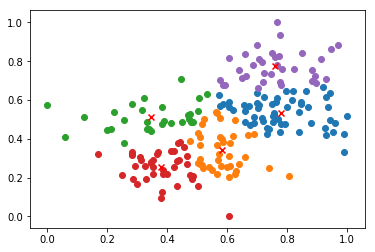

In [32]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(5, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

iteration  0  Inertie :  3.3245876679130557  Difference:  0.36229619421640313
iteration  1  Inertie :  3.0926748477885218  Difference:  0.23191282012453396
iteration  2  Inertie :  3.011246387998251  Difference:  0.08142845979027058
iteration  3  Inertie :  2.984628784266426  Difference:  0.026617603731825312


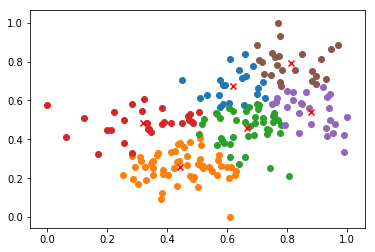

In [33]:
les_centresRand2, l_affectationRand2 = km.kmoyennes(6, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand2,l_affectationRand2)

## Evaluation du résultat d'un clustering

L'évaluation du résultat d'un clustering, c'est-à-dire la mesure de la "qualité" des clusters obtenus, s'effectue selon 2 critères :
- la **compacité** des clusters obtenus
- la **séparabilité** des clusters obtenus


### Mesurer la compacité d'un cluster

Il existe plusieurs possibilités pour définir une mesure de compacité d'un cluster. 

Une telle mesure évalue la proximité des exemples qui sont affectés au cluster.

Exemples de mesures de compacité (en utilisant les notations du cours) :
- la mesure $J_k$ qui mesure l'inertie intra-cluster et qui a été implémentée dans la fonction <tt>inertie_cluster()</tt>

- la mesure de distance intra-cluster $D_{k}$ qui évalue la distance maximale entre 2 exemples d'un même cluster pour l'ensemble des clusters obtenus:
$$D_k = \max_{x, y \in C_k } (d_{E}(x,y))$$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>dist_intracluster</tt> qui, étant donné un ensemble d'exemples, correspondant aux exemples d'un même cluster, rend la valeur de la distance intra-cluster correspondante.

In [34]:
def dist_intracluster(df):
    d_max = 0
    for i, row1 in df.iterrows():
        for j, row2 in df.iterrows():
            if km.dist_vect(row1, row2) > d_max:
                d_max = km.dist_vect(row1, row2)
    return d_max

In [35]:
# Exemple avec les données précédentes: 
for k in range(0,len(l_affectationRand1)):
    DF = DataRandom.iloc[l_affectationRand1[k]]
    print('cluster' + str(k)+": inertie = " + str(km.inertie_cluster(DF)) + "\tintra = "+  str(dist_intracluster(DF)))


cluster0: inertie = 1.0351971569130454	intra = 0.5102369886783217
cluster1: inertie = 0.5234517320453517	intra = 0.54457852061469
cluster2: inertie = 0.6675115400197362	intra = 0.5348425582751752
cluster3: inertie = 0.6121694178255186	intra = 0.43428330729224957
cluster4: inertie = 0.5550180327815258	intra = 0.40794625442077764


Etant donné une partition $P$, on peut mesurer la compacité globale des clusters de cette partition en agrégeant les compacités intra-custer de chaque cluster.

Ainsi, dans notre cas, on peut définir 2 mesures de compacité globable:
- la compacité inertielle $Co_{inertie}$ d'une partition $P$:
    $$Co_{inertie}(P) = J(P)$$
- la compacité intra-clusters $Co_{dist}$ d'une partition $P$
$$Co_{dist}(P) = \max_{k=1..K} D_k$$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>global_intraclusters</tt> qui, étant donné une base d'exemples et un 
dictionnaire d'affectation d'exemples à des clusters rend la valeur de la distance intra-clusters correspondante.

In [36]:
def global_intraclusters(df, dico_aff):
    comp = 0
    for centre in dico_aff:
        df_cluster = df.iloc[dico_aff[centre]]
        dist = dist_intracluster(df_cluster)
        if dist > comp:
             comp = dist
    return comp

In [37]:
# Exemples:
print("Données jouet: "+str(global_intraclusters(data_2Dnorm,l_affectation)))
print("Données aléatoire: "+str(global_intraclusters(DataRandom,l_affectationRand2)))

print("Avec l'inertie :")
print("Données jouet: "+str(km.inertie_globale(data_2Dnorm,l_affectation)))
print("Données aléatoire: "+str(km.inertie_globale(DataRandom,l_affectationRand2)))


Données jouet: 0.7571428571428572
Données aléatoire: 0.5059617044895582
Avec l'inertie :
Données jouet: 1.0401919339164236
Données aléatoire: 2.984628784266426


### Mesurer la séparabilité

Une mesure de séparabilité évalue la distance entre les groupes d'un clustering d'une partition $P$ donnée.

Il existe plusieurs mesures de ce genre, par exemple, la mesure la plus évidente est la distance minimale entre deux clusters de la :
    $$Se_{min}(P) = \min_{k= 1..K, l=1..K}(d_E(c_k,c_l)) $$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>sep_clusters</tt> qui, étant donné un ensemble de centres rend la valeur de la distance minimale entre 2 centres.
    

In [38]:
def sep_clusters(df):
    d_min = float("inf")
    for i, row1 in df.iterrows():
        for j, row2 in df.iterrows():
            if i != j:
                if km.dist_vect(row1, row2) < d_min:
                    d_min = km.dist_vect(row1, row2)
    return d_min

In [39]:
# Avec les données jouet:
print("Séparabilité: "+str(sep_clusters(les_centres)))


Séparabilité: 0.5809828739070049


In [40]:
# Avec les données générées aléatoirement:
print("Séparabilité: "+str(sep_clusters(les_centresRand2)))


Séparabilité: 0.22173179503764012


### Evaluation d'un clustering

Pour obtenir une évaluation du résultat d'un clustering, on combine une mesure de sa séparabilité et une mesure de sa compacité globale.
Par exemple (remarque: nous donnons ici des versions adaptées à notre tp de ces mesures):
- index de Dunn d'une partition $P$:
$$I_{Dunn}(P)= \frac{Co_{dist}(P)}{Se_{min}(P)}$$

- index de Xie et Beni d'une partition $P$:
$$I_{XB}(P) = \frac{Co_{inertie}(P)}{Se_{min}(P)}$$

Dans les 2 cas, une bonne partition minimise la valeur de l'index.

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>evaluation()</tt> qui prend en argument une chaîne de caractères donnant le nom de l'index choisi ("Dunn" ou "XB"), une base d'exemples, un ensemble de centres et une affectation, et rend la valeur de l'index correspondant.

In [43]:
def evaluation(chaine, df, df_centres, dico_aff):
    if chaine == "Dunn":
        return global_intraclusters(df, dico_aff)/sep_clusters(df_centres)
    else:
        return km.inertie_globale(df, dico_aff)/sep_clusters(df_centres)

In [44]:
print("Pour les données jouet:")
print("\tDunn:\t"+str(evaluation("Dunn",data_2Dnorm,les_centres,l_affectation)))
print("\tXB:\t"+str(evaluation("XB",data_2Dnorm,les_centres,l_affectation)))

print("Pour les données aléatoires (6 clusters):")
print("\tDunn:\t"+str(evaluation("Dunn",DataRandom,les_centresRand2,l_affectationRand2)))
print("\tXB:\t"+str(evaluation("XB",DataRandom,les_centresRand2,l_affectationRand2)))

print("Pour les données aléatoires (5 clusters):")
print("\tDunn:\t"+str(evaluation("Dunn",DataRandom,les_centresRand1,l_affectationRand1)))
print("\tXB:\t"+str(evaluation("XB",DataRandom,les_centresRand1,l_affectationRand1)))


Pour les données jouet:
	Dunn:	1.3032102857889911
	XB:	1.7904003381740339
Pour les données aléatoires (6 clusters):
	Dunn:	2.2818635658619395
	XB:	13.460535886428781
Pour les données aléatoires (5 clusters):
	Dunn:	2.4787078924540644
	XB:	15.445188990333369


<font size="+1" color="RED">**[Q]**</font> Afficher le résultat de chaque clustering sur les données en indiquant les valeurs des indices de Dunn et de Xie & Beni. Quelles conclusions pouvez-vous en tirer?

## Optimiser le nombre de clusters

La mesure d'évaluation d'un clustering précédente peut être utilisée pour déterminer automatiquement une bonne valeur pour $K$ (le nombre de clusters de la partition).

Ainsi, pour une base d'exemples $X$, l'approche suivante peut être utilisée :
- choisir une valeur pour $K$
- appliquer l'algorithme des K-moyennes avec cette valeur $K$ sur la base $X$
- évaluer le résultat du clustering obtenu en utilisant un index
- recommencer pour une autre valeur de $K$ et comparer le résultat, 
on choisit alors la valeur de $K$ qui a donné la meilleure partition selon le critère choisi.


<font size="+1" color="RED">**[Q]**</font> Implémenter l'approche d'optimisation du nombre de clusters. Vous devez tester des valeurs de $K$ de $2$ à $10$ et afficher la valeur optimale du nombre de clusters. Vous tracerez la courbe donnant la valeur de l'index obtenue pour chaque valeur de $K$ testée. Vous réaliserez cette expérimentation d'abord avec l'index de Dunn, puis avec l'index de Xie-Beni.

Tester plusieurs bases d'exemples, en particulier, construire des bases d'exemples aléatoires contenant plusieurs groupes (2, 3, 4, 5 groupes) et afficher la courbe de la variation de l'index pour des valeurs de $K$ variant de 2 à 10.

## Préparation pour le projet

Le temps restant de la séance est consacré au projet.

